## Importing Data

In [1]:
from keras.datasets import mnist

# This takes a while because it's a large dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
# a single image of a digit
image1 = x_train[0]
print(image1.shape)
print(type(image1))
print(f"This sample is a handwritten digit number: {y_train[0]}")

(28, 28)
<class 'numpy.ndarray'>
This sample is a handwritten digit number: 5


Each image is a 28x28 numpy ndarray. The value of each index is 0-255. The value of 255 represents a black pixel.

- x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

- y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

- x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

- y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

## Viewing the Sample as an Image

In [3]:
from PIL import Image
import numpy as np
img = Image.fromarray(image1, 'L')
img # show the image

## Format the Data

In [4]:
x_train = x_train.reshape(60000,784)/255
x_test = x_test.reshape(10000,784)/255
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Each 2D image is now a 1D vector with dimension (1, 28x28) = (1, 784). The value of each pixel is divided by 255 so that each value is now between 0-1.

## Sources

<a href="http://yann.lecun.com/exdb/mnist/">MNIST homepage</a>

<a href="https://github.com/kahleeeb3/ML-Project">ML-Project</a>

<a href="https://keras.io/api/datasets/mnist/">Keras API reference MNIST</a>

## Model Training

We want to minimize the cost function:
$$E = \sum_{d \in D} (o_d-t_d)^2$$
where $o_d$ is the value we predicted and $t_d$ is the target value. Minimizing this cost function is the same as minimizing:
$$E = \frac{1}{2}\sum_{d \in D} (o_d-t_d)^2$$.
We can minimize this function by taking the **Gradient Descent** which for the sigmoid function is:
$$ \frac{\partial E}{\partial i} =  -\sum_{d \in D} (t_d-o_d)o_d(1-o_d)x_{i,d}$$
where $x_{i,d}$ is the attribute value. We then use the following update rule
$$w_i^{t+1} = w_i^{t} \eta \nabla E[w]$$

In [5]:
nodes = 128 # number of nodes in the hidden layer
eta = 1 # learning rate

# need to initialize weights and biases to a random value that is 
# uniformly distributed over the half-open interval [-1, 1).

w1 = np.random.uniform(-1,1,size=(28*28,nodes)) # size (784, nodes)
w2 = np.random.uniform(-1,1,size=(nodes,10)) # size (nodes, 10)

In [6]:
#Sigmoid funstion
def sigmoid(x):
    return 1/(np.exp(-x)+1)    

#derivative of sigmoid
def d_sigmoid(x):
    return (np.exp(-x))/((np.exp(-x)+1)**2)

#Softmax
def softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)

#derivative of softmax
def d_softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))

In [7]:
# lets do a single example
y = np.zeros(10)
y[y_train[0]-1] = 1 # sample 1 label (5)
print(y)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


The update rule states that
$$w_{i,j} = w_{i,j}+\Delta w_{i,j}$$

Since we know,
$$\Delta w_{i,j} = \eta \delta_{j}x_{i,j}$$

then the update rule follows below
$$w_{i,j} = w_{i,j}+\eta \delta_{j}x_{i,j}$$

for the output layer:
$$\delta_{k} = o_k(1-o_k)(t_k-o_k)$$

for the hidden layer:
$$\delta_{h} = o_h(1-o_h) \sum_{k\in outputs}w_{h,k}\delta_k$$

### Translate

For the output layer, the update rule follows below
$$w^{(2)}_{i,j} = w^{(2)}_{i,j}+\eta\delta_{j}x_{i,j}$$

<!-- $$\delta_{2} = a^{(2)}\left(1 - a^{(2)}\right)\left(y -a^{(2)}\right)$$ -->

$$\delta_{k} = o_k(1-o_k)(t_k-o_k)$$

In [8]:
x1 = x_train[0] # sample 1 attributes (784)
z1 = np.dot(x1,w1)

x2 = sigmoid(z1)
z2 = np.dot(x2,w2)

x3 = sigmoid(z2)

In [22]:
# update d2
dk = x3*(1-x3)*(y-x3)
dw2 = eta*np.dot(x2[:,None],dk[None,:]) # eta* (dk.x2)
# w2 = w2+dw2

# update d1
dh = x2*(1-x2)*np.sum(np.dot(w2,dk))
dw1 = eta*np.dot(x1[:,None],dh[None,:]) # eta* (dh.x1)
w1 = w1 + dw2

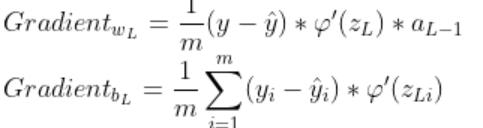

(784, 100)